## Link-up equations

If we assume that we have a panel under approximately uniform remote stress with a series of holes, we can use the link-up equation (11.5f) to see when the plastic zones from the larger, lead crack and the shorter crack connect.

In this problem, we will make the assumption that the lead crack is long enough that we can use the usual center-crack formula for a finite-width panel. $\beta$ for the crack near a hole can be found using (2.12) with $P=0$.

Parameters for this example: panel width is 36 inches, hole diameter is 0.25 inches, hole pitch is 1.5 inches, and panel thickness is 0.125 inches. We will consider two materials (2024 and 7075). For 2024 we have $\sigma_{YS} = 42 \text{ ksi}$ and $K_c = 120 \text{ ksi}\sqrt{\text{in}}$ and for 7075 we use $\sigma_{YS} = 67 \text{ ksi}$ and $K_c = 60 \text{ ksi}\sqrt{\text{in}}$.

For this panel, we assume that the small cracks at each hole have $c=0.02 \text{ in.}$ and the initial lead crack has $2a = 8 \text{ in.}$.

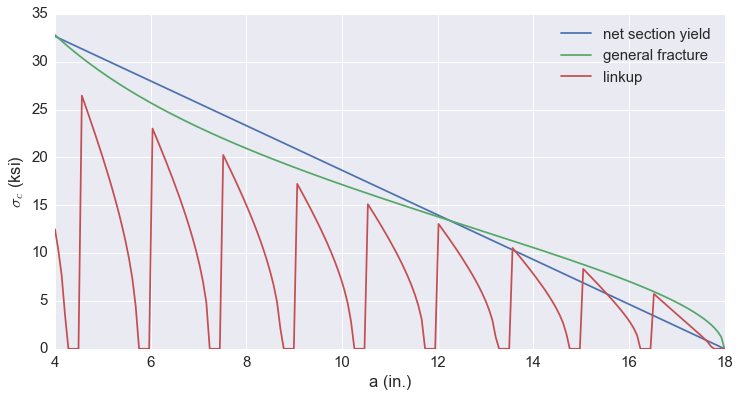

In [29]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
sb.set(font_scale=1.5)
%matplotlib inline

#panel properties
a0 = 4.0 #inches, initial crack length
W = 36.0 #inches, panel width
a = np.linspace(a0,W/2,200) #crack length array (from a0 to end of panel, W/2)
t = 0.125 #inches, panel thickness
c = 0.02 #inches, MSD crack(s)
d = 0.25 #inches, hole diameter
r = d/2 #inches, hole radius
p = 1.5 #inches, hole pitch
l = c + r #inches, parameter for link-up equation

#2024
s_ys = 42.0 #ksi, yield strength
kc = 120.0 #ksi sqrt(in), fracture toughness

#net section yield
s_net = s_ys*(W/2-a)/(W/2)

#general fracture
s_frac = kc/(np.sqrt(np.pi*a/np.cos(np.pi*a/W)))

#beta for crack near a hole, p. 53-54
b3 = .7071 + .7548*(r/(r+c)) + .3415*(r/(r+c))**2 + .6420*(r/(r+c))**3 + .9196*(r/(r+c))**4
fw = np.sqrt(1./np.cos(np.pi*r/W)/np.cos(np.pi*(r+c/2)/(W-c)))
N = 2.65 - 0.24*(2.75-W/d)**2
if N < 2.275:
    N = 2.275
fww = 1-N**(W/d)*(2*c/(W-d))**(W/d+.5)
beta_msd = b3*fw*fww

s_msd = [] #empty array
#loop through crack values to find L
for i in a:
    #i%1.5 gives remainder of i/1.5
    #calculate L
    L = p - d - c - i%p
    if L < 0:
        s_msd.append(0) #this means crack tip is inside a hole or msd crack
    else:
        #otherwise we proceed with the usual calculation
        beta_lead = np.sqrt(1./np.cos(np.pi*i/W))
        sc = s_ys*np.sqrt(2*L/(i*beta_lead**2 + l*beta_msd**2))
        s_msd.append(sc)

plt.figure(figsize=(12,6))
plt.plot(a,s_net,label='net section yield')
plt.plot(a,s_frac,label='general fracture')
plt.plot(a,s_msd,label='linkup')
plt.legend(loc='best')
plt.xlabel('a (in.)')
plt.ylabel('$\sigma_c$ (ksi)')

If we repeat the plot for the same panel with 7075 we find

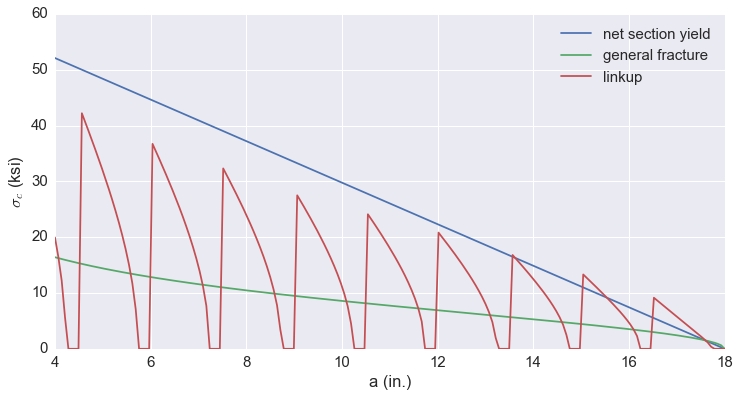

In [30]:
#7075
s_ys = 67.0 #ksi, yield strength
kc = 60.0 #ksi sqrt(in), fracture toughness

#net section yield
s_net = s_ys*(W/2-a)/(W/2)

#general fracture
s_frac = kc/(np.sqrt(np.pi*a/np.cos(np.pi*a/W)))

#beta for crack near a hole, p. 53-54
b3 = .7071 + .7548*(r/(r+c)) + .3415*(r/(r+c))**2 + .6420*(r/(r+c))**3 + .9196*(r/(r+c))**4
fw = np.sqrt(1./np.cos(np.pi*r/W)/np.cos(np.pi*(r+c/2)/(W-c)))
N = 2.65 - 0.24*(2.75-W/d)**2
if N < 2.275:
    N = 2.275
fww = 1-N**(W/d)*(2*c/(W-d))**(W/d+.5)
beta_msd = b3*fw*fww

s_msd = [] #empty array
#loop through crack values to find L
for i in a:
    #i%1.5 gives remainder of i/1.5
    #calculate L
    L = p - d - c - i%p
    if L < 0:
        s_msd.append(0) #this means crack tip is inside a hole or msd crack
    else:
        #otherwise we proceed with the usual calculation
        beta_lead = np.sqrt(1./np.cos(np.pi*i/W))
        sc = s_ys*np.sqrt(2*L/(i*beta_lead**2 + l*beta_msd**2))
        s_msd.append(sc)

plt.figure(figsize=(12,6))
plt.plot(a,s_net,label='net section yield')
plt.plot(a,s_frac,label='general fracture')
plt.plot(a,s_msd,label='linkup')
plt.legend(loc='best')
plt.xlabel('a (in.)')
plt.ylabel('$\sigma_c$ (ksi)')

For 7075, which is relatively brittle, the plastic zone is significantly smaller than in 2024, so the linkup equation actually predicts a higher residual strength than general LEFM.

## Modified linkup equations

While the plastic zone provides some useful theoretical discussion for the linkup phenomenon, it does not agree very well with experimental data. WSU and Lockheed research made some modifications to the linkup equation specific to 2024-T3 and7075-T6.

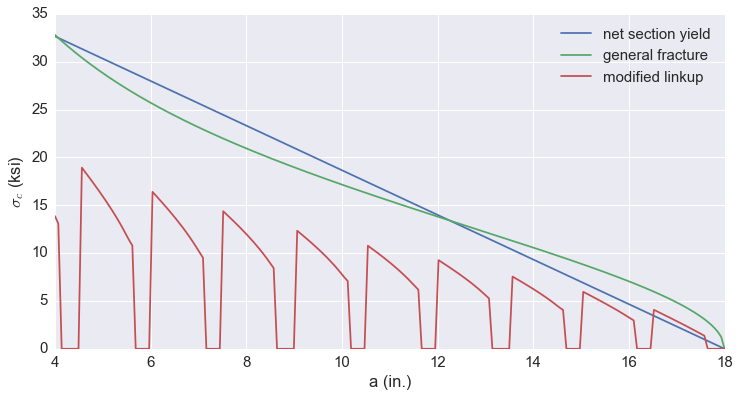

In [31]:
#2024
s_ys = 42.0 #ksi, yield strength
kc = 120.0 #ksi sqrt(in), fracture toughness
A1 = 0.3054 #b-basis
A2 = 1.3502 #b-basis

#net section yield
s_net = s_ys*(W/2-a)/(W/2)

#general fracture
s_frac = kc/(np.sqrt(np.pi*a/np.cos(np.pi*a/W)))

#beta for crack near a hole, p. 53-54
b3 = .7071 + .7548*(r/(r+c)) + .3415*(r/(r+c))**2 + .6420*(r/(r+c))**3 + .9196*(r/(r+c))**4
fw = np.sqrt(1./np.cos(np.pi*r/W)/np.cos(np.pi*(r+c/2)/(W-c)))
N = 2.65 - 0.24*(2.75-W/d)**2
if N < 2.275:
    N = 2.275
fww = 1-N**(W/d)*(2*c/(W-d))**(W/d+.5)
beta_msd = b3*fw*fww

s_msd = [] #empty array
#loop through crack values to find L
for i in a:
    #i%1.5 gives remainder of i/1.5
    #calculate L
    L = p - d - c - i%p
    if L < 0.1:
        s_msd.append(0) #this means crack tip is inside a hole or msd crack
    else:
        #otherwise we proceed with the usual calculation
        beta_lead = np.sqrt(1./np.cos(np.pi*i/W))
        sc = s_ys*np.sqrt(2*L/(i*beta_lead**2 + l*beta_msd**2))
        sc_mod = sc/(A1*np.log(L) + A2)
        s_msd.append(sc_mod)

plt.figure(figsize=(12,6))
plt.plot(a,s_net,label='net section yield')
plt.plot(a,s_frac,label='general fracture')
plt.plot(a,s_msd,label='modified linkup')
plt.legend(loc='best')
plt.xlabel('a (in.)')
plt.ylabel('$\sigma_c$ (ksi)')

For 7075, WSU developed two different modifications. One which modifies the linkup equation (similar to above) and one which modifies the genereal LEFM failure criteria.

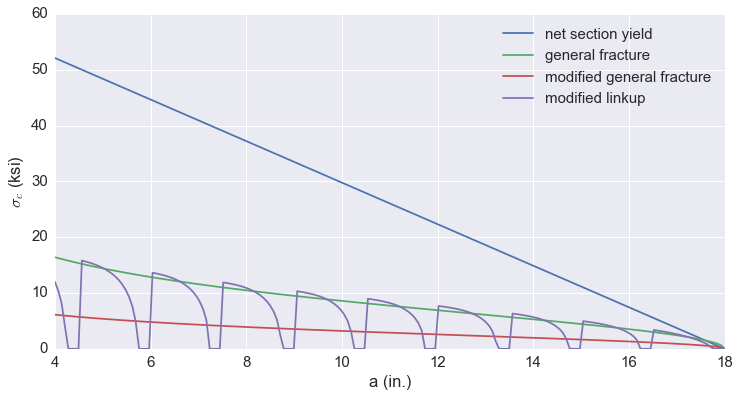

In [32]:
#7075
s_ys = 67.0 #ksi, yield strength
kc = 60.0 #ksi sqrt(in), fracture toughness
B1 = 1.417 #b-basis
B2 = 1.073 #b-basis

#net section yield
s_net = s_ys*(W/2-a)/(W/2)

#general fracture
s_frac = kc/(np.sqrt(np.pi*a/np.cos(np.pi*a/W)))
#modified fracture
s_frac_mod = kc/(np.sqrt(np.pi*a/np.cos(np.pi*a/W))*(.856-.946*np.log(l)))

#beta for crack near a hole, p. 53-54
b3 = .7071 + .7548*(r/(r+c)) + .3415*(r/(r+c))**2 + .6420*(r/(r+c))**3 + .9196*(r/(r+c))**4
fw = np.sqrt(1./np.cos(np.pi*r/W)/np.cos(np.pi*(r+c/2)/(W-c)))
N = 2.65 - 0.24*(2.75-W/d)**2
if N < 2.275:
    N = 2.275
fww = 1-N**(W/d)*(2*c/(W-d))**(W/d+.5)
beta_msd = b3*fw*fww

s_msd = [] #empty array
#loop through crack values to find L
for i in a:
    #i%1.5 gives remainder of i/1.5
    #calculate L
    L = p - d - c - i%p
    if L < 0:
        s_msd.append(0) #this means crack tip is inside a hole or msd crack
    else:
        #otherwise we proceed with the usual calculation
        beta_lead = np.sqrt(1./np.cos(np.pi*i/W))
        sc = s_ys*np.sqrt(2*L/(i*beta_lead**2 + l*beta_msd**2))
        sc_mod = sc/(B1+B2*L)
        s_msd.append(sc_mod)

plt.figure(figsize=(12,6))
plt.plot(a,s_net,label='net section yield')
plt.plot(a,s_frac,label='general fracture')
plt.plot(a,s_frac_mod,label='modified general fracture')
plt.plot(a,s_msd,label='modified linkup')
plt.legend(loc='best')
plt.xlabel('a (in.)')
plt.ylabel('$\sigma_c$ (ksi)')